In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [3]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
train = pd.read_csv('/content/drive/MyDrive/2023/AIVLE/miniproject5/train_dataset.csv')
test = pd.read_csv('/content/drive/MyDrive/2023/AIVLE/miniproject5/test_dataset.csv')
submission = pd.read_csv('/content/drive/MyDrive/2023/AIVLE/miniproject5/sample_submission.csv')
train

,tBodyAcc-mean()-Z,"tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-Y,1",tBodyAccJerk-mean()-X,tBodyAccJerk-mean()-Y,"tBodyAccJerk-arCoeff()-X,2","tBodyAccJerk-arCoeff()-Y,1","tBodyAccJerk-arCoeff()-Y,3","tBodyAccJerk-arCoeff()-Z,1","tBodyGyro-arCoeff()-Z,3",...,fBodyGyro-min()-Y,"fBodyGyro-bandsEnergy()-49,64.1",fBodyBodyAccJerkMag-iqr(),fBodyBodyAccJerkMag-entropy(),fBodyBodyGyroMag-mean(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-meanFreq(),"angle(tBodyAccMean,gravity)",Activity,Activity_dynamic
0,-0.103362,-0.094784,-0.109208,0.068584,-0.014314,0.198600,-0.073666,0.113098,-0.058315,0.354270,...,-0.996607,-0.999969,-0.985141,-1.000000,-0.975435,-0.993965,-0.032207,-0.042494,STANDING,4
1,-0.098163,-0.052478,0.464764,0.075947,0.004456,0.130310,0.401913,0.512569,0.011987,0.503466,...,-0.992681,-0.999941,-0.988982,-1.000000,-0.978534,-0.994733,-0.246705,-0.062899,LAYING,3
2,-0.108717,-0.226718,0.301165,0.079530,0.014504,0.111340,0.263556,0.562730,0.314589,0.132061,...,-0.999971,-0.999976,-0.991535,-1.000000,-0.991953,-0.992200,0.388765,0.000265,STANDING,4
3,-0.150354,0.549363,-0.384117,-0.309509,-0.201293,0.411714,-0.372620,0.288349,-0.259441,-0.711894,...,-0.876509,-0.969331,-0.387366,0.323260,-0.479590,-0.889227,0.050888,-0.255125,WALKING,0
4,0.091229,-0.091537,-0.610793,0.584212,-0.266815,-0.248696,-0.628852,0.095282,-0.240501,-0.305964,...,-0.960097,-0.990292,-0.220963,0.446385,-0.433366,-0.810446,-0.013902,-0.044344,WALKING_DOWNSTAIRS,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5876,-0.131974,-0.059080,0.000441,0.082392,-0.008733,0.180157,0.041011,0.173103,-0.001160,0.419680,...,-0.997983,-0.999967,-0.987428,-1.000000,-0.981119,-0.983765,0.052914,-0.034888,SITTING,5
5877,-0.105174,0.275170,-0.191391,-0.108297,0.050577,0.168315,-0.313497,-0.067457,-0.006740,-0.260559,...,-0.951267,-0.982422,-0.561358,0.241367,-0.415217,-0.845447,0.325461,0.721718,WALKING_UPSTAIRS,1
5878,-0.107440,-0.025156,0.407618,0.070742,0.011347,0.222424,0.259452,0.497603,0.187073,0.155540,...,-0.998177,-0.999920,-0.989684,-1.000000,-0.991452,-0.989032,0.362439,0.060173,LAYING,3
5879,-0.121001,0.686123,-0.606018,-0.085843,-0.039197,0.499451,-0.628068,0.337687,-0.037529,-0.229386,...,-0.687973,-0.940509,-0.465531,0.323401,-0.504324,-0.867993,0.031915,0.260880,WALKING_UPSTAIRS,1


In [6]:
test.head()

,tBodyAcc-mean()-Z,"tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-Y,1",tBodyAccJerk-mean()-X,tBodyAccJerk-mean()-Y,"tBodyAccJerk-arCoeff()-X,2","tBodyAccJerk-arCoeff()-Y,1","tBodyAccJerk-arCoeff()-Y,3","tBodyAccJerk-arCoeff()-Z,1","tBodyGyro-arCoeff()-Z,3",...,"fBodyAccJerk-bandsEnergy()-41,48.2","fBodyAccJerk-bandsEnergy()-49,64.2",fBodyGyro-min()-Y,"fBodyGyro-bandsEnergy()-49,64.1",fBodyBodyAccJerkMag-iqr(),fBodyBodyAccJerkMag-entropy(),fBodyBodyGyroMag-mean(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-meanFreq(),"angle(tBodyAccMean,gravity)"
0,-0.116683,0.059275,0.005050,0.074204,0.005466,0.229130,0.064325,0.208520,0.128505,0.178639,...,-0.999635,-0.999936,-0.998551,-0.999986,-0.995350,-1.000000,-0.992586,-0.995778,0.255432,-0.018043
1,-0.118412,-0.219041,-0.255267,0.076562,0.000427,0.027814,-0.278551,-0.008195,0.044317,-0.057602,...,-0.999677,-0.999838,-0.997029,-0.999954,-0.984526,-1.000000,-0.970626,-0.991971,-0.166341,-0.022456
2,-0.087303,0.552368,-0.025095,0.069317,0.251780,0.586216,-0.079610,0.096668,-0.219583,-0.469174,...,-0.907521,-0.825203,-0.983423,-0.971489,-0.169575,0.629909,-0.428692,-0.653058,0.468354,-0.362616
3,-0.108381,-0.097072,0.198134,0.078063,-0.003247,0.235713,0.110652,-0.056465,0.164869,0.319642,...,-0.999328,-0.999625,-0.998581,-0.999995,-0.992776,-1.000000,-0.993341,-0.996087,0.337635,0.289548
4,-0.078856,0.202431,-0.546042,0.066171,0.089363,0.205810,-0.576410,-0.394336,0.111303,0.194097,...,-0.999203,-0.997885,-0.995305,-0.999823,-0.958406,-0.839332,-0.779465,-0.981570,-0.594792,0.010111


In [7]:
submission.head()

,ID,Activity
0,0,5
1,1,4
2,2,0
3,3,5
4,4,3


In [8]:
submission.Activity.unique()

array([5, 4, 0, 3, 1, 2])

3    1115
4    1087
5    1032
0     998
1     858
2     791
Name: Activity_dynamic, dtype: int64
3    0.189594
4    0.184833
5    0.175480
0    0.169699
1    0.145894
2    0.134501
Name: Activity_dynamic, dtype: float64


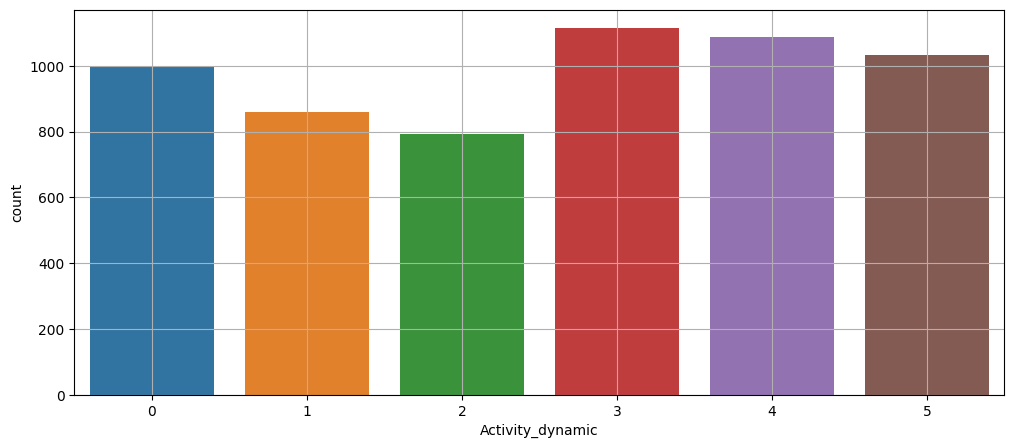

In [9]:
var = 'Activity_dynamic'
train[var].describe()
def eda1_c(data = train, var = var) : 
    plt.figure(figsize=(12,5))
    print(data[var].value_counts()) 
    print(data[var].value_counts() / data[var].shape[0]) 
    sns.countplot(x=data[var]) 
    plt.grid() 
    
    plt.show()
    
    
eda1_c()

In [10]:
X = train.drop(['Activity', 'Activity_dynamic'], axis = 1) #'subject'
y = train['Activity_dynamic']

In [11]:
X_computer = X.copy()

col_list = X_computer.columns

# 이중 for문을 사용하여 feature 자기 자신의 제곱과 두 feature간의 곱이라는 새로운 feature를 추가합니다.
for i in range(len(col_list)):
    for j in range(i, len(col_list)):
        X_computer[f'{col_list[i]}*{col_list[j]}'] = X_computer[col_list[i]] * X_computer[col_list[j]]

X_computer

<ipython-input-11-441f68d2ea88>:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_computer[f'{col_list[i]}*{col_list[j]}'] = X_computer[col_list[i]] * X_computer[col_list[j]]
<ipython-input-11-441f68d2ea88>:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_computer[f'{col_list[i]}*{col_list[j]}'] = X_computer[col_list[i]] * X_computer[col_list[j]]
<ipython-input-11-441f68d2ea88>:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  

,tBodyAcc-mean()-Z,"tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-Y,1",tBodyAccJerk-mean()-X,tBodyAccJerk-mean()-Y,"tBodyAccJerk-arCoeff()-X,2","tBodyAccJerk-arCoeff()-Y,1","tBodyAccJerk-arCoeff()-Y,3","tBodyAccJerk-arCoeff()-Z,1","tBodyGyro-arCoeff()-Z,3",...,fBodyBodyGyroMag-mean()*fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-mean()*fBodyBodyGyroJerkMag-min(),fBodyBodyGyroMag-mean()*fBodyBodyGyroJerkMag-meanFreq(),"fBodyBodyGyroMag-mean()*angle(tBodyAccMean,gravity)",fBodyBodyGyroJerkMag-min()*fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-min()*fBodyBodyGyroJerkMag-meanFreq(),"fBodyBodyGyroJerkMag-min()*angle(tBodyAccMean,gravity)",fBodyBodyGyroJerkMag-meanFreq()*fBodyBodyGyroJerkMag-meanFreq(),"fBodyBodyGyroJerkMag-meanFreq()*angle(tBodyAccMean,gravity)","angle(tBodyAccMean,gravity)*angle(tBodyAccMean,gravity)"
0,-0.103362,-0.094784,-0.109208,0.068584,-0.014314,0.198600,-0.073666,0.113098,-0.058315,0.354270,...,0.951473,0.969548,0.031415,0.041450,0.987966,0.032012,0.042238,0.001037,0.001369,1.805739e-03
1,-0.098163,-0.052478,0.464764,0.075947,0.004456,0.130310,0.401913,0.512569,0.011987,0.503466,...,0.957528,0.973380,0.241409,0.061549,0.989495,0.245406,0.062568,0.060863,0.015518,3.956342e-03
2,-0.108717,-0.226718,0.301165,0.079530,0.014504,0.111340,0.263556,0.562730,0.314589,0.132061,...,0.983970,0.984216,-0.385636,-0.000263,0.984461,-0.385732,-0.000263,0.151138,0.000103,7.030321e-08
3,-0.150354,0.549363,-0.384117,-0.309509,-0.201293,0.411714,-0.372620,0.288349,-0.259441,-0.711894,...,0.230006,0.426464,-0.024406,0.122355,0.790724,-0.045251,0.226864,0.002590,-0.012983,6.508891e-02
4,0.091229,-0.091537,-0.610793,0.584212,-0.266815,-0.248696,-0.628852,0.095282,-0.240501,-0.305964,...,0.187806,0.351219,0.006024,0.019217,0.656823,0.011267,0.035938,0.000193,0.000616,1.966388e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5876,-0.131974,-0.059080,0.000441,0.082392,-0.008733,0.180157,0.041011,0.173103,-0.001160,0.419680,...,0.962594,0.965190,-0.051915,0.034229,0.967793,-0.052055,0.034321,0.002800,-0.001846,1.217158e-03
5877,-0.105174,0.275170,-0.191391,-0.108297,0.050577,0.168315,-0.313497,-0.067457,-0.006740,-0.260559,...,0.172405,0.351044,-0.135137,-0.299670,0.714780,-0.275160,-0.610174,0.105925,0.234891,5.208763e-01
5878,-0.107440,-0.025156,0.407618,0.070742,0.011347,0.222424,0.259452,0.497603,0.187073,0.155540,...,0.982977,0.980577,-0.359341,-0.059658,0.978183,-0.358464,-0.059513,0.131362,0.021809,3.620746e-03
5879,-0.121001,0.686123,-0.606018,-0.085843,-0.039197,0.499451,-0.628068,0.337687,-0.037529,-0.229386,...,0.254342,0.437749,-0.016095,-0.131568,0.753412,-0.027702,-0.226442,0.001019,0.008326,6.805815e-02


In [12]:
test_X_computer = test.copy()

col_list = test_X_computer.columns

# 이중 for문을 사용하여 feature 자기 자신의 제곱과 두 feature간의 곱이라는 새로운 feature를 추가합니다.
for i in range(len(col_list)):
    for j in range(i, len(col_list)):
        test_X_computer[f'{col_list[i]}*{col_list[j]}'] = test_X_computer[col_list[i]] * test_X_computer[col_list[j]]

test_X_computer

<ipython-input-12-8b5e58b58548>:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_X_computer[f'{col_list[i]}*{col_list[j]}'] = test_X_computer[col_list[i]] * test_X_computer[col_list[j]]
<ipython-input-12-8b5e58b58548>:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_X_computer[f'{col_list[i]}*{col_list[j]}'] = test_X_computer[col_list[i]] * test_X_computer[col_list[j]]
<ipython-input-12-8b5e58b58548>:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times,

,tBodyAcc-mean()-Z,"tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-Y,1",tBodyAccJerk-mean()-X,tBodyAccJerk-mean()-Y,"tBodyAccJerk-arCoeff()-X,2","tBodyAccJerk-arCoeff()-Y,1","tBodyAccJerk-arCoeff()-Y,3","tBodyAccJerk-arCoeff()-Z,1","tBodyGyro-arCoeff()-Z,3",...,fBodyBodyGyroMag-mean()*fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-mean()*fBodyBodyGyroJerkMag-min(),fBodyBodyGyroMag-mean()*fBodyBodyGyroJerkMag-meanFreq(),"fBodyBodyGyroMag-mean()*angle(tBodyAccMean,gravity)",fBodyBodyGyroJerkMag-min()*fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-min()*fBodyBodyGyroJerkMag-meanFreq(),"fBodyBodyGyroJerkMag-min()*angle(tBodyAccMean,gravity)",fBodyBodyGyroJerkMag-meanFreq()*fBodyBodyGyroJerkMag-meanFreq(),"fBodyBodyGyroJerkMag-meanFreq()*angle(tBodyAccMean,gravity)","angle(tBodyAccMean,gravity)*angle(tBodyAccMean,gravity)"
0,-0.116683,0.059275,0.005050,0.074204,0.005466,0.229130,0.064325,0.208520,0.128505,0.178639,...,0.985228,0.988396,-0.253539,0.017910,0.991574,-0.254354,0.017967,0.065246,-0.004609,0.000326
1,-0.118412,-0.219041,-0.255267,0.076562,0.000427,0.027814,-0.278551,-0.008195,0.044317,-0.057602,...,0.942116,0.962833,0.161455,0.021797,0.984006,0.165005,0.022276,0.027669,0.003735,0.000504
2,-0.087303,0.552368,-0.025095,0.069317,0.251780,0.586216,-0.079610,0.096668,-0.219583,-0.469174,...,0.183777,0.279960,-0.200780,0.155451,0.426484,-0.305862,0.236809,0.219356,-0.169833,0.131491
3,-0.108381,-0.097072,0.198134,0.078063,-0.003247,0.235713,0.110652,-0.056465,0.164869,0.319642,...,0.986726,0.989454,-0.335387,-0.287620,0.992189,-0.336314,-0.288415,0.113998,0.097762,0.083838
4,-0.078856,0.202431,-0.546042,0.066171,0.089363,0.205810,-0.576410,-0.394336,0.111303,0.194097,...,0.607566,0.765100,0.463619,-0.007881,0.963480,0.583830,-0.009924,0.353777,-0.006014,0.000102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1466,-0.106398,-0.081939,0.185382,0.071741,0.009478,0.019718,0.246692,0.370205,0.002332,0.232695,...,0.986923,0.988991,-0.165034,0.054428,0.991063,-0.165380,0.054542,0.027597,-0.009102,0.003002
1467,-0.109078,-0.191660,0.252811,0.075298,0.007827,0.218177,0.220255,0.243859,0.323898,0.106566,...,0.996010,0.992229,-0.424210,-0.076181,0.988462,-0.422599,-0.075891,0.180675,0.032446,0.005827
1468,-0.121377,0.190174,-0.004620,0.282992,-0.166026,0.282091,-0.016718,0.446784,-0.189417,-0.223721,...,0.012316,0.061457,-0.020825,-0.036664,0.306677,-0.103920,-0.182958,0.035214,0.061997,0.109150
1469,-0.116644,0.103635,0.263890,0.089082,-0.006599,0.335221,0.083270,0.160313,0.504003,-0.073582,...,0.895919,0.903378,0.189696,0.045882,0.910900,0.191275,0.046264,0.040165,0.009715,0.002350


In [ ]:
gr_mu = X_computer.copy()
gr_mu['Activity_dynamic'] = y
gr_mu = gr_mu.groupby('Activity_dynamic').mean() #.iloc[:, 1 :]
gr_mu

,tBodyAcc-mean()-Z,"tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-Y,1",tBodyAccJerk-mean()-X,tBodyAccJerk-mean()-Y,"tBodyAccJerk-arCoeff()-X,2","tBodyAccJerk-arCoeff()-Y,1","tBodyAccJerk-arCoeff()-Y,3","tBodyAccJerk-arCoeff()-Z,1","tBodyGyro-arCoeff()-Z,3",...,fBodyBodyGyroMag-mean()*fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-mean()*fBodyBodyGyroJerkMag-min(),fBodyBodyGyroMag-mean()*fBodyBodyGyroJerkMag-meanFreq(),"fBodyBodyGyroMag-mean()*angle(tBodyAccMean,gravity)",fBodyBodyGyroJerkMag-min()*fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-min()*fBodyBodyGyroJerkMag-meanFreq(),"fBodyBodyGyroJerkMag-min()*angle(tBodyAccMean,gravity)",fBodyBodyGyroJerkMag-meanFreq()*fBodyBodyGyroJerkMag-meanFreq(),"fBodyBodyGyroJerkMag-meanFreq()*angle(tBodyAccMean,gravity)","angle(tBodyAccMean,gravity)*angle(tBodyAccMean,gravity)"
Activity_dynamic,,,,,,,,,,,,,,,,,,,,,
0,-0.109834,0.288241,-0.166113,0.078603,0.010038,0.207763,-0.227867,0.206183,-0.187390,-0.222937,...,0.201387,0.311679,-0.039961,-0.014111,0.570010,-0.080610,-0.024690,0.039065,-0.000154,0.211253
1,-0.120764,0.292868,-0.258575,0.080381,0.010831,0.156899,-0.298263,0.074291,-0.314188,-0.169670,...,0.226324,0.358744,-0.036877,-0.016450,0.658131,-0.066223,-0.028296,0.034596,0.003341,0.175364
2,-0.105793,0.222245,-0.158760,0.094806,-0.000564,0.115432,-0.249926,0.130439,-0.168125,-0.130934,...,0.136082,0.214440,-0.019298,0.012707,0.503964,-0.054135,0.036299,0.041047,-0.003054,0.271941
3,-0.107785,-0.003056,0.171253,0.080726,0.011556,0.127634,0.127425,0.226354,0.152238,0.154518,...,0.915838,0.941675,-0.162820,-0.012546,0.972392,-0.160279,-0.013703,0.105787,-0.001843,0.049800
4,-0.107184,-0.050595,0.047395,0.075113,0.009085,0.187081,0.036985,0.172380,0.117812,0.134017,...,0.913322,0.940229,-0.107981,-0.006944,0.970544,-0.102367,-0.007290,0.112875,0.001336,0.014854
5,-0.106352,-0.043001,0.114130,0.075753,0.006258,0.174696,0.085630,0.196831,0.109524,0.124388,...,0.933393,0.955318,-0.177082,-0.013669,0.980152,-0.175397,-0.014234,0.114422,-0.000204,0.030043


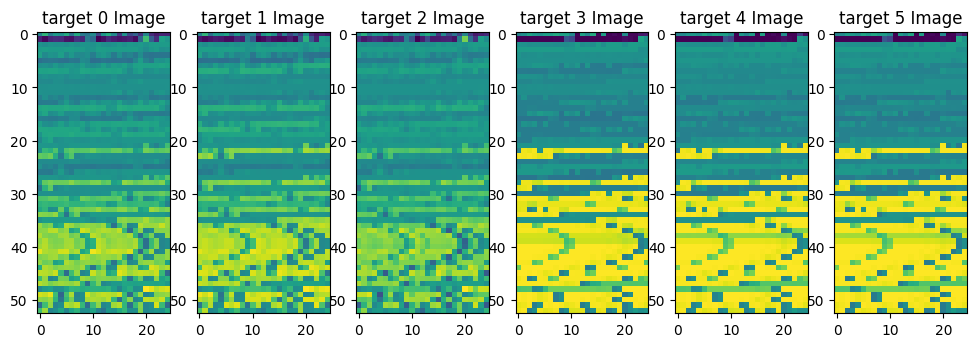

In [ ]:
f, a = plt.subplots(1, 6, figsize = (12, 6))
for i in range(6) :
    a[i].set_title(f'target {i} Image')
    a[i].imshow(np.array(gr_mu.iloc[i]).reshape(53, 25))

In [ ]:
# X_computer = X_computer[gr_mu.columns]
# test_X_computer = test_X_computer[gr_mu.columns]

In [ ]:
# from sklearn.preprocessing import MinMaxScaler

# # MinMaxScaler 선언 및 Fitting
# mMscaler = MinMaxScaler()
# mMscaler.fit(X_computer)

# # 데이터 변환
# mMscaled_data = mMscaler.transform(X_computer)
# mMscaled_test = mMscaler.transform(test_X_computer)

# # 데이터 프레임으로 저장
# X_sc = pd.DataFrame(mMscaled_data, columns = X_computer.columns)
# test_sc = pd.DataFrame(mMscaled_test, columns = test_X_computer.columns)

In [ ]:
from sklearn.preprocessing import StandardScaler

# MinMaxScaler 선언 및 Fitting
mMscaler = StandardScaler()
mMscaler.fit(X_computer)

# 데이터 변환
mMscaled_data = mMscaler.transform(X_computer)
mMscaled_test = mMscaler.transform(test_X_computer)

# 데이터 프레임으로 저장
X_sc = pd.DataFrame(mMscaled_data, columns = X_computer.columns)
test_sc = pd.DataFrame(mMscaled_test, columns = test_X_computer.columns)

In [ ]:
# from sklearn.preprocessing import MinMaxScaler

# # MinMaxScaler 선언 및 Fitting
# mMscaler = MinMaxScaler()
# mMscaler.fit(X)

# # 데이터 변환
# mMscaled_data = mMscaler.transform(X)
# mMscaled_test = mMscaler.transform(test)

# # 데이터 프레임으로 저장
# X_sc = pd.DataFrame(mMscaled_data, columns = X.columns)
# test_sc = pd.DataFrame(mMscaled_test, columns = test.columns)

In [ ]:
from imblearn.over_sampling import SMOTE

X_resampled, y_resampled = SMOTE().fit_resample(X_sc, y)

## 머신러닝

In [ ]:
import xgboost as xgb 
from sklearn.model_selection import cross_val_score

xg = xgb.XGBClassifier()

# 성능 지표는 정확도(accuracy) , 교차 검증 세트는 5개 
scores = cross_val_score(xg , X_resampled, y_resampled, scoring='accuracy',cv=3)

print('교차 검증별 정확도:',np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores),4))

교차 검증별 정확도: [0.7839 0.7641 0.8045]
평균 검증 정확도: 0.7842


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42)

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# 객체 생성, 일단은 트리 100개만 만듦
xgb_model = XGBClassifier(n_estimators=100)

# 후보 파라미터 선정
params = {'n_estimators' : [500, 1000], 'max_depth':[5,3], 'min_child_weight':[1,0.1], 'colsample_bytree':[0.5,0.3]}

# gridsearchcv 객체 정보 입력(어떤 모델, 파라미터 후보, 교차검증 몇 번)
gridcv = GridSearchCV(xgb_model, param_grid=params, cv=3)

# 파라미터 튜닝 시작
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric='auc', eval_set=[(X_val, y_val)])

#튜닝된 파라미터 출력
print(gridcv.best_params_)

In [ ]:
xg = XGBClassifier(n_estimators=500, colsample_bytree=0.8)
xg = xgb.XGBClassifier()

xg.fit(X_resampled, y_resampled)
pred = xg.predict(test_sc)

In [ ]:
submission['Activity'] = pred

In [ ]:
submission

,ID,Activity
0,0,4
1,1,4
2,2,0
3,3,5
4,4,5
...,...,...
1466,1466,5
1467,1467,4
1468,1468,2
1469,1469,3


In [ ]:
submission.to_csv('world_submission_15.csv', index = False)

In [ ]:
from sklearn.linear_model import LogisticRegression #모델 불러오기
from sklearn import metrics
from sklearn.model_selection import cross_val_score


# LogisticRegression을 이용하여 학습/예측/평가 수행. 
lr_clf = LogisticRegression(solver='liblinear', C = 10, penalty = 'l2', max_iter = 500) 
# 성능 지표는 정확도(accuracy) , 교차 검증 세트는 5개 
scores = cross_val_score(lr_clf , X_sc, y, scoring='accuracy',cv=5)

print('교차 검증별 정확도:',np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores),4))

교차 검증별 정확도: [0.6924 0.6922 0.6845 0.6437 0.6786]
평균 검증 정확도: 0.6783


In [ ]:
X_resampled.values

array([[0.4483189 , 0.4472285 , 0.44539619, ..., 0.00301764, 0.48813333,
        0.47257689],
       [0.45091831, 0.46901839, 0.73238198, ..., 0.00263327, 0.37597275,
        0.46225326],
       [0.44564134, 0.37927519, 0.65058246, ..., 0.00389985, 0.70825766,
        0.49420978],
       ...,
       [0.44537637, 0.34644537, 0.57548844, ..., 0.00328708, 0.74478711,
        0.50205633],
       [0.45003233, 0.55464455, 0.50522687, ..., 0.00395415, 0.63324727,
        0.54498079],
       [0.4460638 , 0.47702891, 0.54064963, ..., 0.00139476, 0.75024631,
        0.51505629]])

### 최종 제출 모델

In [ ]:
from lightgbm import LGBMClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score


lgbm = LGBMClassifier(n_estimators=300, colsample_bytree = 0.8)#learning_rate =0.1 

#lightGBM에서는 rf (랜덤포레스트) / gbdt (Gradient Boosted Decision Trees) / dart (드랍아웃 Regression Trees) / goss (Gradient-based One-Side Sampling)을 쓴다.

# 성능 지표는 정확도(accuracy) , 교차 검증 세트는 5개 
scores = cross_val_score(lgbm ,X_resampled.values, y_resampled, scoring='accuracy',cv=3)

print('교차 검증별 정확도:',np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores),4))


교차 검증별 정확도: [0.7879 0.7825 0.8224]
평균 검증 정확도: 0.7976


In [ ]:
# xg = XGBClassifier(n_estimators=1000, learning_rate=0.02, max_depth=7, min_child_weight=1, colsample_bytree=0.75, reg_alpha=0.03)
lgbm.fit(X_resampled.values, y_resampled)
pred = lgbm.predict(test_sc.values)

In [ ]:
submission['Activity'] = pred

In [ ]:
submission

,ID,Activity
0,0,5
1,1,4
2,2,0
3,3,5
4,4,4
...,...,...
1466,1466,5
1467,1467,5
1468,1468,2
1469,1469,3


In [ ]:
submission.to_csv('world_submission_18.csv', index = False)

## 딥러닝

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from keras.layers import Conv2D, BatchNormalization, GlobalAveragePooling2D, Dropout
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import *
import tensorflow as tf

In [ ]:
ohe = OneHotEncoder(sparse = False)

In [ ]:
data_shape = [-1,10,5,1]
x1 = np.array(X_resampled).reshape(-1, 10, 5, 1)
y1 = ohe.fit_transform(np.array(y_resampled).reshape(-1, 1))
test_x1 = np.array(test_sc).reshape(-1, 10, 5, 1)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
skf = StratifiedKFold(n_splits = 5, random_state = 42, shuffle = True)
es = EarlyStopping(monitor = 'val_acc', patience = 25, mode = 'max', verbose = 0)

In [ ]:
acc1 = []
acc2 = []
acc3 = []
pred = np.zeros((test_x1.shape[0], 6))
filters = 32
activation = 'elu'

kernels1 = [(1,1), (10,1), (2,5), (2,5)]
max_pool_shape1 = []
input_shape1 = data_shape[1:]

kernels2 = [(1,1),(2,5), (5,2), (2,2)]
max_pool_shape2 = []
input_shape2 = data_shape[1:]

kernels3 = [(1,1),(5,1), (5,2), (2,5)]
max_pool_shape3 = []
input_shape3 = data_shape[1:]

In [ ]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=1)  

In [ ]:
from typing import List, Tuple
from keras.losses import CategoricalCrossentropy, SparseCategoricalCrossentropy

def create_model(filters:int, kernels:List[Tuple], input_shape ,activation,max_pool_shapes, has_dense):
    model = Sequential([
        Conv2D(filters=filters, kernel_size=kernels[0],padding='same',activation=activation, input_shape = input_shape),
        BatchNormalization(),
        Dropout(0.2),
    ])

    for i in range(1, len(kernels)):
        model.add(Conv2D(filters=filters, kernel_size=kernels[i],padding='same',activation=activation))
        model.add(BatchNormalization())
        if max_pool_shapes:
            model.add(MaxPooling2D(max_pool_shapes[i - 1]))
        model.add(Dropout(0.2))

    model.add(GlobalAveragePooling2D())
    if has_dense:
        model.add(Dense(64, activation = activation))
    model.add(Dropout(0.2))
    model.add(Dense(6, activation = 'softmax'))

    return model

In [ ]:
for i, (train_idx, valid_idx) in enumerate(skf.split(x1, y_resampled)) :
    print(f'{i + 1} Fold Training.....')
    train_x1, train_y1 = x1[train_idx], y1[train_idx]
    valid_x1, valid_y1 = x1[valid_idx], y1[valid_idx]

    with tf.device('/device:GPU:0'):

        model1 = create_model(filters=filters, 
                            kernels=kernels1,
                            input_shape=input_shape1,
                            activation=activation, 
                            max_pool_shapes=max_pool_shape1,
                            has_dense = False)
        
        model2 = create_model(filters=filters, 
                            kernels=kernels2,
                            input_shape=input_shape1,
                            activation=activation, 
                            max_pool_shapes=max_pool_shape2,
                            has_dense = True)
        
        # model2의 경우 dense layer를 한번 더 통과
        
        model3 = create_model(filters=filters, 
                            kernels=kernels3,
                            input_shape=input_shape3,
                            activation=activation, 
                            max_pool_shapes=max_pool_shape3,
                            has_dense = False)
        
        
        mc1 = ModelCheckpoint(f'model1_{i + 1}.h5', save_best_only = True, monitor = 'val_acc', mode = 'max', verbose = 0)
        mc2 = ModelCheckpoint(f'model2_{i + 1}.h5', save_best_only = True, monitor = 'val_acc', mode = 'max', verbose = 0)
        mc3 = ModelCheckpoint(f'model3_{i + 1}.h5', save_best_only = True, monitor = 'val_acc', mode = 'max', verbose = 0)

        cce = CategoricalCrossentropy(label_smoothing = 0.3) # 일반화를 위한 label smoothing
        
        model1.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), loss = cce, metrics = ['acc'])
        model2.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), loss = cce, metrics = ['acc'])
        model3.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), loss = cce, metrics = ['acc'])

        model1.fit(train_x1, train_y1, validation_data = (valid_x1, valid_y1), epochs = 100, batch_size = 16, callbacks = [es, mc1], verbose = 0)
        model2.fit(train_x1, train_y1, validation_data = (valid_x1, valid_y1), epochs = 100, batch_size = 16, callbacks = [es, mc2], verbose = 0)
        model3.fit(train_x1, train_y1, validation_data = (valid_x1, valid_y1), epochs = 100, batch_size = 16, callbacks = [es, mc3], verbose = 0)

    best1 = load_model(f'model1_{i + 1}.h5')
    best2 = load_model(f'model2_{i + 1}.h5')
    best3 = load_model(f'model3_{i + 1}.h5')

    valid_pred1 = best1.predict(valid_x1)
    valid_pred2 = best2.predict(valid_x1)
    valid_pred3 = best3.predict(valid_x1)

    ensem_pred = np.argmax(valid_pred1 + valid_pred2 + valid_pred3, axis = 1)

    valid_pred1 = np.argmax(valid_pred1, axis = 1)
    valid_pred2 = np.argmax(valid_pred2, axis = 1)
    valid_pred3 = np.argmax(valid_pred3, axis = 1)


    fold_model1_acc = accuracy_score(np.argmax(valid_y1, axis = 1), valid_pred1)
    fold_model2_acc = accuracy_score(np.argmax(valid_y1, axis = 1), valid_pred2)
    fold_model3_acc = accuracy_score(np.argmax(valid_y1, axis = 1), valid_pred3)

    ensem_acc = accuracy_score(np.argmax(valid_y1, axis = 1), ensem_pred)

    print(f'{i + 1} model1 ACC = {fold_model1_acc:.4f}')
    print(f'{i + 1} model2 ACC = {fold_model2_acc:.4f}')
    print(f'{i + 1} model3 ACC = {fold_model3_acc:.4f}')
    print(f'{i + 1} ensemble ACC = {ensem_acc:.4f}\n')

    acc1.append(fold_model1_acc)
    acc2.append(fold_model2_acc)
    acc3.append(fold_model3_acc)

    fold_pred = best1.predict(test_x1) + best2.predict(test_x1)+ best3.predict(test_x1)
    
    total_div = 5 * skf.n_splits
    fold_pred /= total_div

    pred += fold_pred

1 Fold Training.....
42/42 [==============================] - 0s 2ms/step
1 model1 ACC = 0.7138
1 model2 ACC = 0.7055
1 model3 ACC = 0.7055
1 ensemble ACC = 0.7108

46/46 [==============================] - 0s 2ms/step
2 Fold Training.....
42/42 [==============================] - 0s 2ms/step
2 model1 ACC = 0.7519
2 model2 ACC = 0.7414
2 model3 ACC = 0.7407
2 ensemble ACC = 0.7511

46/46 [==============================] - 0s 2ms/step
3 Fold Training.....
42/42 [==============================] - 0s 2ms/step
3 model1 ACC = 0.7265
3 model2 ACC = 0.7242
3 model3 ACC = 0.7235
3 ensemble ACC = 0.7302

46/46 [==============================] - 0s 2ms/step
4 Fold Training.....


KeyboardInterrupt: ignored

In [ ]:
print(np.mean(acc1))
print(np.mean(acc2))
print(np.mean(acc3))
print(np.mean(acc1 + acc2 + acc3))

0.7227204783258594
0.7100149476831092
0.5960388639760837
0.6762580966616841


In [ ]:
submission['Activity'] = np.argmax(pred, axis = 1)

In [ ]:
submission

,ID,Activity
0,0,5
1,1,4
2,2,0
3,3,5
4,4,3
...,...,...
1466,1466,5
1467,1467,5
1468,1468,2
1469,1469,3


In [ ]:
submission.to_csv('world_submission_8.csv', index = False)

## 딥러닝2 LSTM

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from keras.layers import Conv2D, BatchNormalization, GlobalAveragePooling2D, Dropout
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import *
import tensorflow as tf

In [ ]:
ohe = OneHotEncoder(sparse = False)

In [ ]:
data_shape = [-1,10,5,1]
x1 = np.array(X_resampled).reshape(-1, 10, 5, 1)
y1 = ohe.fit_transform(np.array(y_resampled).reshape(-1, 1))
test_x1 = np.array(test_sc).reshape(-1, 10, 5, 1)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
skf = StratifiedKFold(n_splits = 3, random_state = 42, shuffle = True)
es = EarlyStopping(monitor = 'val_acc', patience = 10, mode = 'max', verbose = 0)

In [ ]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=1)  

In [ ]:
from keras.layers import SimpleRNN
rnn_acc = []
rnn_pred = np.zeros((test_x1.shape[0], 6))

for i, (tr_idx, val_idx) in enumerate(skf.split(x1, y_resampled)) :
    print(f'{i + 1} Fold Training.....')
    tr_x, tr_y = x1[tr_idx], y1[tr_idx]
    val_x, val_y = x1[val_idx], y1[val_idx]
    
    ### RNN 모델
    lstm = Sequential()
    lstm.add(LSTM(32, input_shape = (10,5), return_sequences = True))
    # lstm.add(LSTM(32, return_sequences = True))
    lstm.add(LSTM(32, return_sequences = False))
    lstm.add(Flatten())
    # lstm.add(Dense(32, activation = 'relu'))
    lstm.add(Dense(6, activation = 'softmax'))

    ### ModelCheckPoint Fold마다 갱신
    mc = ModelCheckpoint(f'model_{i + 1}.h5', save_best_only = True, monitor = 'val_acc', mode = 'max', verbose = 0)
    
    ### 모델 compile
    lstm.compile(optimizer = Adam(learning_rate = 0.004), loss = 'mean_squared_error', metrics = ['acc'])

    lstm.fit(tr_x, tr_y, validation_data = (val_x, val_y), epochs = 100, batch_size = 32, callbacks = [es, mc], verbose = 0)

    ### 최고 성능 기록 모델 Load
    best = load_model(f'model_{i + 1}.h5')
    ### validation predict
    val_pred = best.predict(val_x)
    ### 확률값 중 최대값을 클래스로 매칭
    val_cls = np.argmax(val_pred, axis = 1)
    ### Fold별 정확도 산출
    fold_cnn_acc = accuracy_score(np.argmax(val_y, axis = 1), val_cls)
    rnn_acc.append(fold_cnn_acc)
    print(f'{i + 1} Fold ACC of LSTM = {fold_cnn_acc}\n')

    ### Fold별 test 데이터에 대한 예측값 생성 및 앙상블
    fold_pred = best.predict(test_x1) / 3
    rnn_pred += fold_pred

1 Fold Training.....
70/70 [==============================] - 1s 2ms/step
1 Fold ACC of LSTM = 0.6659192825112108

46/46 [==============================] - 0s 2ms/step
2 Fold Training.....
70/70 [==============================] - 1s 2ms/step
2 Fold ACC of LSTM = 0.704932735426009

46/46 [==============================] - 0s 2ms/step
3 Fold Training.....
70/70 [==============================] - 1s 2ms/step
3 Fold ACC of LSTM = 0.6825112107623318

46/46 [==============================] - 0s 2ms/step


In [ ]:
data_shape = [-1,53, 25,1]
x1 = np.array(X_sc).reshape(-1, 53, 25, 1)
y1 = ohe.fit_transform(np.array(y).reshape(-1, 1))
test_x1 = np.array(test_sc).reshape(-1, 53, 25, 1)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
data_shape = [-1,53, 25,1]
x1 = np.array(X_resampled).reshape(-1,53, 25, 1)
y1 = ohe.fit_transform(np.array(y_resampled).reshape(-1, 1))
test_x1 = np.array(test_sc).reshape(-1, 53, 25, 1)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Dense, Conv1D, Bidirectional, LSTM, GRU, RNN, MaxPool1D, Flatten, Conv2D

In [ ]:
#####################
# 1. 세션 초기화
clear_session()

# 2. 모델 사슬처럼 엮기
il = Input(shape=(53, 25))

# 2. Conv1D 블록 : 필터수 64개, 윈도우 사이즈 5
hl1 = Conv1D(filters=64,
             kernel_size=5,
             activation='swish')(il)
# 3. Bidirectional layer :
#     * 정방향 : LSTM, 히든스테이트 32 
#     * 역방향 : LSTM, 히든스테이트 32
lstm32 = LSTM(32, return_sequences=True)
hl2 = Bidirectional(lstm32)(hl1)
# 4. Bidirectional layer :
#     * 정방향 : GRU, 히든스테이트 32
#     * 역방향 : RNN, 히든스테이트 16
forward_gru32 = GRU(32, return_sequences=True)
backward_lstm16 = LSTM(16, return_sequences=True, go_backwards=True)
hl3 = Bidirectional(forward_gru32, backward_layer=backward_lstm16)(hl2)
# 5. Conv1D 블록 : 필터수 32개, 윈도우 사이즈 5
hl4 = Conv1D(filters=32,
             kernel_size=5,
             activation='swish')(hl3)
# 6. MaxPool1D 블록 : 필터사이즈2
hl5 = MaxPool1D(pool_size=2)(hl4)
# 7. 플래튼
hl6 = Flatten()(hl5)
# 8. FC Layer : 노드 1024개
hl7 = Dense(1024, activation='relu')(hl6)
# 9. 시그모이드 레이어
ol = Dense(6, activation='softmax')(hl7)

# 3. 모델 처음과 끝 지정
model = Model(il, ol)

# 4. 컴파일
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')

# 요약
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 53, 25)]          0         
                                                                 
 conv1d (Conv1D)             (None, 49, 64)            8064      
                                                                 
 bidirectional (Bidirectiona  (None, 49, 64)           24832     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 49, 48)           14592     
 nal)                                                            
                                                                 
 conv1d_1 (Conv1D)           (None, 45, 32)            7712      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 22, 32)           0     

In [ ]:
#####################
es = EarlyStopping(monitor='val_accuracy',
                   min_delta=0,
                   patience=30,
                   verbose=1,
                   restore_best_weights=True)

mc = ModelCheckpoint(f'model_best2.h5', save_best_only = True, monitor = 'val_accuracy', mode = 'max', verbose = 1)

#####################
model.fit(x1, y1, epochs=1000, verbose=1, callbacks=[es, mc], validation_split=0.2)

Epoch 1/1000
146/147 [============================>.] - ETA: 0s - loss: 1.2207 - accuracy: 0.3626
Epoch 1: val_accuracy improved from -inf to 0.39422, saving model to model_best2.h5
147/147 [==============================] - 9s 19ms/step - loss: 1.2202 - accuracy: 0.3631 - val_loss: 1.0737 - val_accuracy: 0.3942
Epoch 2/1000
141/147 [===========================>..] - ETA: 0s - loss: 1.0765 - accuracy: 0.4089
Epoch 2: val_accuracy improved from 0.39422 to 0.41206, saving model to model_best2.h5
147/147 [==============================] - 1s 9ms/step - loss: 1.0772 - accuracy: 0.4069 - val_loss: 1.0689 - val_accuracy: 0.4121
Epoch 3/1000
141/147 [===========================>..] - ETA: 0s - loss: 1.0631 - accuracy: 0.4074
Epoch 3: val_accuracy did not improve from 0.41206
147/147 [==============================] - 1s 9ms/step - loss: 1.0662 - accuracy: 0.4071 - val_loss: 1.0615 - val_accuracy: 0.3942
Epoch 4/1000
142/147 [===========================>..] - ETA: 0s - loss: 1.0471 - accuracy:

In [ ]:
y_pred = model.predict(test_x1)


46/46 [==============================] - 2s 3ms/step


In [ ]:
submission['Activity'] = np.argmax(y_pred, axis = 1)

In [ ]:
submission

,ID,Activity
0,0,4
1,1,5
2,2,0
3,3,5
4,4,3
...,...,...
1466,1466,5
1467,1467,5
1468,1468,2
1469,1469,3


In [ ]:
submission.to_csv('world_submission_10.csv', index = False)

In [ ]:
clear_session()

cnn = Sequential()
cnn.add(Conv2D(1024, (2, 2), padding = "same", activation = 'relu', input_shape = (53, 25, 1)))
cnn.add(Dropout(0.25))
cnn.add(BatchNormalization())
cnn.add(Conv2D(256, (1, 1), padding = "same", activation = 'relu'))
cnn.add(Dropout(0.25))
cnn.add(BatchNormalization())
cnn.add(Conv2D(512, (4, 4), padding = "same", activation = 'relu'))
cnn.add(Dropout(0.25))
cnn.add(BatchNormalization())
cnn.add(GlobalAveragePooling2D())
cnn.add(Flatten())
cnn.add(Dense(128, activation = 'relu'))
cnn.add(Dropout(0.1))
cnn.add(Dense(64, activation = 'relu'))
cnn.add(Dropout(0.1))
cnn.add(Dense(32, activation = 'relu'))
cnn.add(Dropout(0.1))
cnn.add(Dense(16, activation = 'relu'))
cnn.add(Dense(6, activation = 'softmax'))

### ModelCheckPoint Fold마다 갱신
mc = ModelCheckpoint(f'model_cnn.h5', save_best_only = True, monitor = 'val_acc', mode = 'max', verbose = 1)
es = EarlyStopping(monitor = 'val_acc', patience = 50, mode = 'max', verbose = 0)

### 모델 compile
cnn.compile(optimizer = Adam(learning_rate = 0.004), loss = 'categorical_crossentropy', metrics = ['acc'])

cnn.fit(x1, y1, validation_split=0.2, epochs = 1000, batch_size = 32, callbacks = [es, mc], verbose = 1)

Epoch 1/1000
168/168 [==============================] - ETA: 0s - loss: 1.2161 - acc: 0.3793
Epoch 1: val_acc improved from -inf to 0.08445, saving model to model_cnn.h5
168/168 [==============================] - 9s 28ms/step - loss: 1.2161 - acc: 0.3793 - val_loss: 7.3331 - val_acc: 0.0845
Epoch 2/1000
166/168 [============================>.] - ETA: 0s - loss: 1.1269 - acc: 0.3955
Epoch 2: val_acc improved from 0.08445 to 0.33931, saving model to model_cnn.h5
168/168 [==============================] - 4s 22ms/step - loss: 1.1260 - acc: 0.3957 - val_loss: 1.2532 - val_acc: 0.3393
Epoch 3/1000
166/168 [============================>.] - ETA: 0s - loss: 1.1109 - acc: 0.3987
Epoch 3: val_acc improved from 0.33931 to 0.45067, saving model to model_cnn.h5
168/168 [==============================] - 4s 22ms/step - loss: 1.1109 - acc: 0.3991 - val_loss: 1.1454 - val_acc: 0.4507
Epoch 4/1000
165/168 [============================>.] - ETA: 0s - loss: 1.0945 - acc: 0.4095
Epoch 4: val_acc did not 

In [ ]:
y_pred = cnn.predict(test_x1)


46/46 [==============================] - 0s 7ms/step


In [ ]:
submission['Activity'] = np.argmax(y_pred, axis = 1)

In [ ]:
submission

,ID,Activity
0,0,4
1,1,4
2,2,0
3,3,5
4,4,4
...,...,...
1466,1466,5
1467,1467,5
1468,1468,2
1469,1469,3


In [ ]:
submission.to_csv('world_submission_16.csv', index = False)

In [ ]:
# vgg_model = tf.keras.applications.VGG16(weights = 'imagenet',
#                                         include_top = False,
#                                         input_shape=(10,5,3))
# vgg_model.summary()

## 분리

In [ ]:
df = X_sc.copy()
df['target'] = y

df['Activity_dynamic'] = df['target'].apply(lambda x : 0 if x == 0 or x == 1 or x == 2 else 1)

In [ ]:
df

,tBodyAcc-mean()-Z,"tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-Y,1",tBodyAccJerk-mean()-X,tBodyAccJerk-mean()-Y,"tBodyAccJerk-arCoeff()-X,2","tBodyAccJerk-arCoeff()-Y,1","tBodyAccJerk-arCoeff()-Y,3","tBodyAccJerk-arCoeff()-Z,1","tBodyGyro-arCoeff()-Z,3",...,fBodyGyro-min()-Y,"fBodyGyro-bandsEnergy()-49,64.1",fBodyBodyAccJerkMag-iqr(),fBodyBodyAccJerkMag-entropy(),fBodyBodyGyroMag-mean(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-meanFreq(),"angle(tBodyAccMean,gravity)",target,Activity_dynamic
0,0.448319,0.447229,0.445396,0.534292,0.492843,0.614582,0.463167,0.568554,0.489135,0.668398,...,0.001889,0.000015,0.007181,0.000000,0.012283,0.003018,0.488133,0.472577,4,1
1,0.450918,0.469018,0.732382,0.537974,0.502228,0.579566,0.700956,0.772599,0.525651,0.745015,...,0.004077,0.000030,0.005260,0.000000,0.010733,0.002633,0.375973,0.462253,3,1
2,0.445641,0.379275,0.650582,0.539765,0.507252,0.569840,0.631778,0.798220,0.682830,0.554287,...,0.000014,0.000012,0.003983,0.000000,0.004024,0.003900,0.708258,0.494210,4,1
3,0.424823,0.778998,0.307941,0.345245,0.399354,0.723856,0.313690,0.658070,0.384665,0.120890,...,0.068815,0.015335,0.306143,0.661630,0.260205,0.055387,0.531583,0.365002,0,0
4,0.545615,0.448901,0.194603,0.792106,0.366592,0.385231,0.185574,0.559455,0.394503,0.329348,...,0.022235,0.004854,0.389366,0.723193,0.283317,0.094777,0.497705,0.471641,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5876,0.434013,0.465618,0.500220,0.541196,0.495633,0.605125,0.520506,0.599205,0.518822,0.701988,...,0.001122,0.000016,0.006037,0.000000,0.009441,0.008118,0.532643,0.476425,5,1
5877,0.447413,0.637774,0.404305,0.445851,0.525288,0.599053,0.343252,0.476330,0.515924,0.352664,...,0.027155,0.008789,0.219126,0.620684,0.292391,0.077277,0.675157,0.859210,1,0
5878,0.446280,0.483090,0.703809,0.535371,0.505674,0.626798,0.629726,0.764954,0.616595,0.566344,...,0.001014,0.000040,0.004909,0.000000,0.004274,0.005484,0.694492,0.524518,3,1
5879,0.439500,0.849437,0.196991,0.457078,0.480402,0.768843,0.185966,0.683271,0.499931,0.368673,...,0.173878,0.029745,0.267051,0.661701,0.247838,0.066003,0.521662,0.626061,1,0


In [ ]:
df_X = df.drop(['target', 'Activity_dynamic'], axis = 1)
df_y = df['Activity_dynamic']

In [ ]:
# 학습/예측/평가 수행. 
xg = xgb.XGBClassifier()
# 성능 지표는 정확도(accuracy) , 교차 검증 세트는 5개 
scores = cross_val_score(xg , df_X, df_y, scoring='accuracy',cv=5)

print('교차 검증별 정확도:',np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores),4))
# # 5단계 평가하기
# print(confusion_matrix(y_test, y_pred))
# print(classification_report(y_test, y_pred))

교차 검증별 정확도: [0.9949 1.     1.     0.9991 0.9991]
평균 검증 정확도: 0.9986


In [ ]:
df

,tBodyAcc-mean()-Z,"tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-Y,1",tBodyAccJerk-mean()-X,tBodyAccJerk-mean()-Y,"tBodyAccJerk-arCoeff()-X,2","tBodyAccJerk-arCoeff()-Y,1","tBodyAccJerk-arCoeff()-Y,3","tBodyAccJerk-arCoeff()-Z,1","tBodyGyro-arCoeff()-Z,3",...,fBodyGyro-min()-Y,"fBodyGyro-bandsEnergy()-49,64.1",fBodyBodyAccJerkMag-iqr(),fBodyBodyAccJerkMag-entropy(),fBodyBodyGyroMag-mean(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-meanFreq(),"angle(tBodyAccMean,gravity)",target,Activity_dynamic
0,0.448319,0.447229,0.445396,0.534292,0.492843,0.614582,0.463167,0.568554,0.489135,0.668398,...,0.001889,0.000015,0.007181,0.000000,0.012283,0.003018,0.488133,0.472577,4,1
1,0.450918,0.469018,0.732382,0.537974,0.502228,0.579566,0.700956,0.772599,0.525651,0.745015,...,0.004077,0.000030,0.005260,0.000000,0.010733,0.002633,0.375973,0.462253,3,1
2,0.445641,0.379275,0.650582,0.539765,0.507252,0.569840,0.631778,0.798220,0.682830,0.554287,...,0.000014,0.000012,0.003983,0.000000,0.004024,0.003900,0.708258,0.494210,4,1
3,0.424823,0.778998,0.307941,0.345245,0.399354,0.723856,0.313690,0.658070,0.384665,0.120890,...,0.068815,0.015335,0.306143,0.661630,0.260205,0.055387,0.531583,0.365002,0,0
4,0.545615,0.448901,0.194603,0.792106,0.366592,0.385231,0.185574,0.559455,0.394503,0.329348,...,0.022235,0.004854,0.389366,0.723193,0.283317,0.094777,0.497705,0.471641,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5876,0.434013,0.465618,0.500220,0.541196,0.495633,0.605125,0.520506,0.599205,0.518822,0.701988,...,0.001122,0.000016,0.006037,0.000000,0.009441,0.008118,0.532643,0.476425,5,1
5877,0.447413,0.637774,0.404305,0.445851,0.525288,0.599053,0.343252,0.476330,0.515924,0.352664,...,0.027155,0.008789,0.219126,0.620684,0.292391,0.077277,0.675157,0.859210,1,0
5878,0.446280,0.483090,0.703809,0.535371,0.505674,0.626798,0.629726,0.764954,0.616595,0.566344,...,0.001014,0.000040,0.004909,0.000000,0.004274,0.005484,0.694492,0.524518,3,1
5879,0.439500,0.849437,0.196991,0.457078,0.480402,0.768843,0.185966,0.683271,0.499931,0.368673,...,0.173878,0.029745,0.267051,0.661701,0.247838,0.066003,0.521662,0.626061,1,0


In [ ]:
test

,tBodyAcc-mean()-Z,"tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-Y,1",tBodyAccJerk-mean()-X,tBodyAccJerk-mean()-Y,"tBodyAccJerk-arCoeff()-X,2","tBodyAccJerk-arCoeff()-Y,1","tBodyAccJerk-arCoeff()-Y,3","tBodyAccJerk-arCoeff()-Z,1","tBodyGyro-arCoeff()-Z,3",...,"fBodyAccJerk-bandsEnergy()-49,64.2",fBodyGyro-min()-Y,"fBodyGyro-bandsEnergy()-49,64.1",fBodyBodyAccJerkMag-iqr(),fBodyBodyAccJerkMag-entropy(),fBodyBodyGyroMag-mean(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-meanFreq(),"angle(tBodyAccMean,gravity)",Activity_dynamic
0,-0.116683,0.059275,0.005050,0.074204,0.005466,0.229130,0.064325,0.208520,0.128505,0.178639,...,-0.999936,-0.998551,-0.999986,-0.995350,-1.000000,-0.992586,-0.995778,0.255432,-0.018043,1
1,-0.118412,-0.219041,-0.255267,0.076562,0.000427,0.027814,-0.278551,-0.008195,0.044317,-0.057602,...,-0.999838,-0.997029,-0.999954,-0.984526,-1.000000,-0.970626,-0.991971,-0.166341,-0.022456,1
2,-0.087303,0.552368,-0.025095,0.069317,0.251780,0.586216,-0.079610,0.096668,-0.219583,-0.469174,...,-0.825203,-0.983423,-0.971489,-0.169575,0.629909,-0.428692,-0.653058,0.468354,-0.362616,1
3,-0.108381,-0.097072,0.198134,0.078063,-0.003247,0.235713,0.110652,-0.056465,0.164869,0.319642,...,-0.999625,-0.998581,-0.999995,-0.992776,-1.000000,-0.993341,-0.996087,0.337635,0.289548,1
4,-0.078856,0.202431,-0.546042,0.066171,0.089363,0.205810,-0.576410,-0.394336,0.111303,0.194097,...,-0.997885,-0.995305,-0.999823,-0.958406,-0.839332,-0.779465,-0.981570,-0.594792,0.010111,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1466,-0.106398,-0.081939,0.185382,0.071741,0.009478,0.019718,0.246692,0.370205,0.002332,0.232695,...,-0.999642,-0.993454,-0.999949,-0.988987,-1.000000,-0.993440,-0.995521,0.166124,-0.054788,1
1467,-0.109078,-0.191660,0.252811,0.075298,0.007827,0.218177,0.220255,0.243859,0.323898,0.106566,...,-0.999498,-0.999391,-0.999986,-0.996189,-1.000000,-0.998003,-0.994214,0.425059,0.076333,1
1468,-0.121377,0.190174,-0.004620,0.282992,-0.166026,0.282091,-0.016718,0.446784,-0.189417,-0.223721,...,-0.260255,-0.793648,-0.771367,-0.120213,0.711324,-0.110976,-0.553784,0.187655,0.330378,1
1469,-0.116644,0.103635,0.263890,0.089082,-0.006599,0.335221,0.083270,0.160313,0.504003,-0.073582,...,-0.998998,-0.954967,-0.999361,-0.945335,-0.798901,-0.946530,-0.954411,-0.200412,-0.048474,1


In [ ]:
xg.fit(df_X, df_y)
pred = xg.predict(test_sc)

In [ ]:
test['Activity_dynamic'] = pred
test_sc['Activity_dynamic'] = pred

In [ ]:
test_sc

,tBodyAcc-mean()-Z,"tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-Y,1",tBodyAccJerk-mean()-X,tBodyAccJerk-mean()-Y,"tBodyAccJerk-arCoeff()-X,2","tBodyAccJerk-arCoeff()-Y,1","tBodyAccJerk-arCoeff()-Y,3","tBodyAccJerk-arCoeff()-Z,1","tBodyGyro-arCoeff()-Z,3",...,"fBodyAccJerk-bandsEnergy()-49,64.2",fBodyGyro-min()-Y,"fBodyGyro-bandsEnergy()-49,64.1",fBodyBodyAccJerkMag-iqr(),fBodyBodyAccJerkMag-entropy(),fBodyBodyGyroMag-mean(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-meanFreq(),"angle(tBodyAccMean,gravity)",Activity_dynamic
0,0.441658,0.526577,0.502525,0.537102,0.502733,0.630236,0.532163,0.617295,0.586173,0.578206,...,0.000032,0.000806,0.000007,0.002075,0.000000,0.003707,0.002111,0.638539,0.484947,1
1,0.440794,0.383229,0.372367,0.538281,0.500214,0.527012,0.360724,0.506600,0.542444,0.456889,...,0.000081,0.001654,0.000023,0.007489,0.000000,0.014687,0.004015,0.417995,0.482714,1
2,0.456348,0.780546,0.487452,0.534658,0.625890,0.813332,0.460195,0.560163,0.405368,0.245534,...,0.087398,0.009236,0.014256,0.415066,0.814954,0.285654,0.173471,0.749875,0.310619,0
3,0.445810,0.446050,0.599067,0.539031,0.498377,0.633612,0.555326,0.481944,0.605061,0.650616,...,0.000187,0.000789,0.000003,0.003363,0.000000,0.003330,0.001957,0.681522,0.640565,1
4,0.460572,0.600310,0.226979,0.533085,0.544682,0.618279,0.211795,0.309365,0.577238,0.586144,...,0.001058,0.002615,0.000088,0.020552,0.080334,0.110267,0.009215,0.193960,0.499191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1466,0.446801,0.453844,0.592691,0.535870,0.504739,0.522860,0.623346,0.699882,0.520636,0.605966,...,0.000179,0.003646,0.000025,0.005258,0.000000,0.003280,0.002239,0.591840,0.466357,1
1467,0.445461,0.397332,0.626406,0.537649,0.503913,0.624620,0.610128,0.635345,0.687665,0.541195,...,0.000251,0.000337,0.000007,0.001656,0.000000,0.000998,0.002893,0.727236,0.532694,1
1468,0.439312,0.593997,0.497690,0.641496,0.416987,0.657392,0.491641,0.738997,0.421037,0.371582,...,0.369872,0.114990,0.114317,0.439753,0.855662,0.444512,0.223108,0.603098,0.661222,0
1469,0.441678,0.549424,0.631945,0.544541,0.496701,0.684635,0.541635,0.592672,0.781216,0.448683,...,0.000501,0.025093,0.000320,0.027089,0.100549,0.026735,0.022795,0.400179,0.469551,1


### 정적

In [ ]:
test_sc1 = test_sc[(test_sc['Activity_dynamic'] == 0)]
test_sc2 = test_sc[(test_sc['Activity_dynamic'] == 1)]


test_sc1_X = test_sc1.drop(['Activity_dynamic'], axis = 1)
test_sc2_X = test_sc2.drop(['Activity_dynamic'], axis = 1)

In [ ]:
df = X_sc.copy()
df['target'] = y

#df['Activity_dynamic'] = df['target'].apply(lambda x : 0 if x == 'STANDING' or x == 'SITTING' or x == 'LAYING' else 1)
df1 = df[(df['target'] == 0) | (df['target'] == 1) | (df['target'] == 2)]#.reset_index(drop=True)
df2 = df[(df['target'] == 3) | (df['target'] == 4) | (df['target'] == 5)]#.reset_index(drop=True)

In [ ]:
df1_X = df1.drop(['target'], axis = 1)
df1_y = df1['target']

In [ ]:
# 1단계: 불러오기
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
from sklearn.model_selection import cross_val_score


In [ ]:
from imblearn.over_sampling import SMOTE

df1_X_resampled, df1_y_resampled = SMOTE().fit_resample(df1_X, df1_y)

In [ ]:
# 학습/예측/평가 수행. 
dt = RandomForestClassifier()
# 성능 지표는 정확도(accuracy) , 교차 검증 세트는 5개 
scores = cross_val_score(dt , df1_X, df1_y, scoring='accuracy',cv=5)

print('교차 검증별 정확도:',np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores),4))
# # 5단계 평가하기
# print(confusion_matrix(y_test, y_pred))
# print(classification_report(y_test, y_pred))

교차 검증별 정확도: [0.7698 0.7585 0.7921 0.7618 0.7713]
평균 검증 정확도: 0.7707


In [ ]:
import xgboost as xgb 

# 학습/예측/평가 수행. 
xg1 = xgb.XGBClassifier()
# 성능 지표는 정확도(accuracy) , 교차 검증 세트는 5개 
scores = cross_val_score(xg1 , df1_X_resampled, df1_y_resampled, scoring='accuracy',cv=5)

print('교차 검증별 정확도:',np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores),4))
# # 5단계 평가하기
# print(confusion_matrix(y_test, y_pred))
# print(classification_report(y_test, y_pred))

교차 검증별 정확도: [0.8531 0.8414 0.8598 0.8781 0.9147]
평균 검증 정확도: 0.8694


In [ ]:
xg1.fit(df1_X_resampled, df1_y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:
pred1 = xg1.predict(test_sc1_X)

### 동적

In [ ]:
df2_X = df2.drop(['target'], axis = 1)
df2_y = df2['target']

In [ ]:
from imblearn.over_sampling import SMOTE

df2_X_resampled, df2_y_resampled = SMOTE().fit_resample(df2_X, df2_y)

In [ ]:
df2_y

0       4
1       3
2       4
7       4
8       4
       ..
5874    3
5875    4
5876    5
5878    3
5880    5
Name: target, Length: 3234, dtype: int64

In [ ]:
# 학습/예측/평가 수행. 
dt = RandomForestClassifier()
# 성능 지표는 정확도(accuracy) , 교차 검증 세트는 5개 
scores = cross_val_score(dt , df2_X, df2_y, scoring='accuracy',cv=5)

print('교차 검증별 정확도:',np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores),4))
# # 5단계 평가하기
# print(confusion_matrix(y_test, y_pred))
# print(classification_report(y_test, y_pred))

교차 검증별 정확도: [0.6739 0.6321 0.6491 0.6182 0.6238]
평균 검증 정확도: 0.6395


In [ ]:
label_dict = {
    3: 0,
    4: 1,
    5: 2
}

modeling_target = df2.replace({'target' : label_dict}).copy()['target']

In [ ]:
df2_y_resampled = df2_y_resampled.apply(lambda x : x-3)

In [ ]:
import xgboost as xgb 
from sklearn.model_selection import cross_val_score

xg2 = xgb.XGBClassifier()

# 성능 지표는 정확도(accuracy) , 교차 검증 세트는 5개 
scores = cross_val_score(xg2, df2_X_resampled, df2_y_resampled, scoring='accuracy',cv=5)

print('교차 검증별 정확도:',np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores),4))

교차 검증별 정확도: [0.7025 0.6846 0.6906 0.6756 0.7369]
평균 검증 정확도: 0.6981


In [ ]:
xg2.fit(df2_X_resampled, df2_y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:
pred2 = xg2.predict(test_sc2_X)

In [ ]:
pred2 = pred2 + 3
pred2

array([4, 4, 5, 4, 3, 4, 5, 5, 4, 3, 3, 5, 3, 5, 3, 5, 4, 4, 5, 3, 4, 4,
       5, 4, 4, 4, 5, 3, 3, 4, 3, 5, 4, 4, 5, 3, 5, 3, 5, 4, 3, 3, 3, 3,
       3, 4, 4, 5, 5, 5, 4, 5, 4, 5, 4, 5, 3, 4, 4, 3, 5, 4, 3, 4, 3, 4,
       4, 3, 4, 5, 3, 3, 3, 4, 4, 4, 5, 4, 4, 5, 5, 3, 3, 4, 3, 4, 3, 4,
       5, 4, 3, 3, 4, 4, 4, 4, 5, 5, 3, 4, 5, 5, 5, 3, 4, 4, 4, 4, 4, 4,
       4, 5, 3, 3, 5, 5, 4, 5, 3, 4, 5, 3, 5, 4, 3, 4, 4, 5, 5, 3, 3, 3,
       3, 5, 4, 3, 3, 3, 4, 5, 4, 4, 5, 3, 5, 3, 3, 5, 3, 5, 3, 5, 3, 3,
       5, 4, 4, 4, 4, 3, 4, 4, 4, 3, 4, 5, 4, 4, 4, 3, 3, 3, 3, 5, 3, 4,
       3, 4, 4, 5, 4, 4, 3, 3, 5, 3, 3, 3, 3, 3, 4, 5, 4, 5, 5, 5, 3, 4,
       4, 4, 3, 4, 5, 4, 3, 4, 5, 3, 5, 5, 3, 3, 3, 3, 4, 4, 3, 5, 3, 5,
       5, 3, 3, 5, 4, 5, 3, 3, 3, 4, 3, 5, 4, 4, 4, 3, 4, 3, 5, 4, 4, 4,
       5, 4, 4, 5, 5, 5, 3, 3, 3, 3, 3, 3, 4, 3, 3, 4, 4, 3, 4, 3, 4, 3,
       4, 5, 4, 3, 4, 3, 5, 5, 4, 3, 5, 4, 5, 4, 4, 3, 4, 5, 3, 5, 4, 3,
       3, 5, 3, 4, 5, 5, 4, 5, 3, 4, 5, 3, 3, 4, 5,

In [ ]:
test_sc1['pred1'] = pred1
test_sc2['pred2'] = pred2

<ipython-input-220-8ae94879d248>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_sc1['pred1'] = pred1
<ipython-input-220-8ae94879d248>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_sc2['pred2'] = pred2


In [ ]:
temp = pd.concat([test_sc1['pred1'],test_sc2['pred2']],axis=1, join='outer').sort_index()
temp

,pred1,pred2
0,NaN,4.0
1,NaN,4.0
2,0.0,NaN
3,NaN,5.0
4,NaN,4.0
...,...,...
1466,NaN,3.0
1467,NaN,4.0
1468,2.0,NaN
1469,NaN,3.0


In [ ]:
temp = temp.fillna(0)

In [ ]:
temp2 = temp['pred1']+temp['pred2']
temp2 = temp2.astype(int)


In [ ]:
submission['Activity'] = temp2

In [ ]:
submission['Activity'] = submission['Activity'].apply(lambda x : int(x))

In [ ]:
submission

,ID,Activity
0,0,4
1,1,4
2,2,0
3,3,5
4,4,4
...,...,...
1466,1466,3
1467,1467,4
1468,1468,2
1469,1469,3


In [ ]:
submission.to_csv('world_submission_4_2.csv', index = False)